In [8]:
from astromodule.io import read_table


df = read_table('splus_headers+raw.csv')
# df.columns[df.columns.str.startswith('MAR')]
df.columns[df.columns.str.contains('AIRMASS')]
df[df['OAJ PRO REFAIRMASS'].isna()]

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EQUINOX,MJD-OBS,RADESYS,CTYPE1,CUNIT1,...,MAR PRO FWHMMEAN,MAR PRO FWHMBETA,MAR PRO FWHMNSTARS,MAR PRO ELLIPMEAN,COMB_0,COMB_1,COMB_2,EXP_0,EXP_1,EXP_2
1377,True,-32,2,11000,11000,2000.0,58125.793056,ICRS,RA---TAN,deg,...,1.055048,5.62725,1522.0,0.032597,proc_HYDRA-20180107-070633,proc_HYDRA-20180107-070353,proc_HYDRA-20180107-070512,40.0,40.0,40.0


/tmp/ipykernel_182702/2866753258.py:3: ExperimentalWarning:

JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.

/tmp/ipykernel_182702/2866753258.py:7: ExperimentalWarning:

plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.



<Axes: title={'center': 'Pareto-front Plot'}, xlabel='R2', ylabel='MSE'>

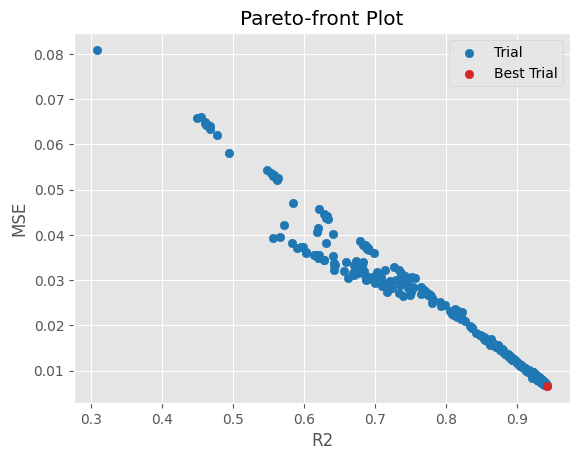

In [45]:
import optuna

study = optuna.load_study(study_name='r_ensemble', storage=optuna.storages.JournalStorage(optuna.storages.JournalFileStorage('logs/r_ensemble.log')))


# optuna.visualization.matplotlib.plot_parallel_coordinate(study, target=lambda trial: trial.values[1])
optuna.visualization.matplotlib.plot_pareto_front(study, target_names=['R2', 'MSE'])

In [55]:
from model import Model

Model.from_best_trial('r', )

{'scaler': 'std',
 'use_rf': True,
 'rf_n_estimators': 490,
 'rf_max_depth': 50,
 'rf_min_samples_split': 19,
 'use_ert': True,
 'ert_n_estimators': 60,
 'ert_max_depth': 120,
 'ert_min_samples_split': 3,
 'use_svr': False,
 'use_knn': False,
 'meta_n_estimators': 49,
 'meta_subsample': 0.685192943595287,
 'meta_min_samples_leaf': 34,
 'meta_max_features': 6}

In [39]:
from astromodule.io import read_table

df = read_table('data/input/input_r.csv')
df[['ZP_r', 'r_FWHM', 'r_3', 'r_5', 'r_10', 'r_50', 'OAJ PRO REFAIRMASS', 'MJD-OBS', 'GAIN', 'REF_MOON_AZ', 'REF_MOON_ALT', 'REF_MOON_SEPARATION', 'REF_MOON_ILLUMINATION']]
# print(*df.columns, sep='\n')
# print(df.columns[df.columns.str.lower().str.contains('moon')])

,ZP_r,r_FWHM,r_3,r_5,r_10,r_50,OAJ PRO REFAIRMASS,MJD-OBS,GAIN,REF_MOON_AZ,REF_MOON_ALT,REF_MOON_SEPARATION,REF_MOON_ILLUMINATION
0,22.710,1.187,21.148520,21.053917,20.366624,16.513544,1.020904,57787.0,246.948563,267.447063,-21.181996,121.146128,0.387133
1,23.573,1.222,21.227944,21.204530,20.599569,17.508702,1.147112,58464.0,115.185078,202.349017,-39.733263,136.648797,0.216855
2,23.558,1.381,20.844331,20.763498,19.958710,16.146721,1.090636,58483.0,115.008508,93.430315,8.260589,59.102098,0.298738
3,23.478,1.232,21.218624,21.184842,20.552156,16.595761,1.040157,58524.0,114.925649,256.501866,-27.734142,133.194701,0.234386
4,23.525,1.507,20.185880,20.192416,19.646178,16.920514,1.008808,58231.0,114.757642,320.555623,29.864875,52.483503,0.513226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,23.527,1.226,21.146427,21.143635,20.465819,17.237755,1.177240,58339.0,113.139241,78.311385,-23.200970,111.336391,0.061999
1629,22.779,1.311,21.036728,21.038195,20.435318,17.696537,1.193558,57696.0,442.761485,247.284530,-2.480134,88.296228,0.160626
1630,23.598,1.417,20.458099,20.437085,19.805167,16.808962,1.223821,58334.0,114.970362,30.941612,45.287715,40.161924,0.539052
1631,22.797,1.543,20.084148,20.095407,19.549160,16.781410,1.153880,57643.0,246.927666,263.020938,23.549132,68.109051,0.755722
